# Opioid Admissions By CT Town

### In this file, I examined the data regarding opioid admissions by town in the state of Connecticut over a 5 year period.

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

------------

In [2]:
opi_town_df = pd.read_csv('../data/opi_admission_by_town.csv')

### Data:
* Opioid Admissions and Unduplicated Clients by Town, 2013-2018
* https://catalog.data.gov/dataset/opioid-admissions-and-unduplicated-clients-by-town-2013-2018)

# Data Frame Exploration

In [3]:
opi_town_df

,FiscalYear,Town,Admissions,Unduplicated Clients,TownGeo
0,2016,Suffield,35.0,24.0,"Suffield, CT\n(41.983549, -72.663124)"
1,2014,Thomaston,51.0,34.0,"Thomaston, CT\n(41.674124, -73.073189)"
2,2013,Sprague,35.0,16.0,"Sprague, CT\n(41.640692, -72.066224)"
3,2015,Monroe,83.0,46.0,"Monroe, CT\n(41.331612, -73.206797)"
4,2016,Cheshire,85.0,50.0,"Cheshire, CT\n(41.498834, -72.901448)"
...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,"Salisbury, CT\n(41.983411, -73.422268)"
846,2013,Bridgewater,7.0,NaN,"Bridgewater, CT\n(41.535109, -73.366386)"
847,2012,Lisbon,NaN,NaN,"Lisbon, CT\n(41.614599, -71.960584)"
848,2016,Goshen,15.0,NaN,"Goshen, CT\n(41.831925, -73.225323)"


### What are the dimensions (number of rows and columns) of the data frame?

In [4]:
opi_town_df.shape

(850, 5)

There are 850 rows & 8 columns. This is a large dataframe.

### What does each row represent?

Each row represents the admissions for a given town of CT for a fiscal year.

### What do the columns mean? 

There are 5 columns:
* FiscalYear = year
* Town = town
* Admissions = total admissions to opioid treatment facilities
* Unduplicated Clients = total unique admissions to opi treatment facilities
* TownGeo = town's geographical coordinates (to be used to map data)

# Data Cleaning 

In [5]:
# rename opi_town_df columns
opi_town_df = opi_town_df.rename(columns={'FiscalYear': 'year',
                                     'Town': 'town', 'Admissions': 'admis','Unduplicated Clients': 'undup_clients', 'TownGeo': 'town_geo'           
                                         })

In [6]:
# function that splits town_geo to lat & long coordinates
def extract_geo(col):
    # extract lat and lng data from town_geo string column
    town, geo_str = col['town_geo'].split('\n')
    lat, lng= geo_str.replace('(','').replace(')','').split(', ')
    return lat, lng

In [7]:
# revised way to assign both columns at the same time
opi_town_df[['lat','lng']]=opi_town_df.apply(extract_geo, axis=1,result_type='expand')

In [8]:
opi_town_df

,year,town,admis,undup_clients,town_geo,lat,lng
0,2016,Suffield,35.0,24.0,"Suffield, CT\n(41.983549, -72.663124)",41.983549,-72.663124
1,2014,Thomaston,51.0,34.0,"Thomaston, CT\n(41.674124, -73.073189)",41.674124,-73.073189
2,2013,Sprague,35.0,16.0,"Sprague, CT\n(41.640692, -72.066224)",41.640692,-72.066224
3,2015,Monroe,83.0,46.0,"Monroe, CT\n(41.331612, -73.206797)",41.331612,-73.206797
4,2016,Cheshire,85.0,50.0,"Cheshire, CT\n(41.498834, -72.901448)",41.498834,-72.901448
...,...,...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,"Salisbury, CT\n(41.983411, -73.422268)",41.983411,-73.422268
846,2013,Bridgewater,7.0,NaN,"Bridgewater, CT\n(41.535109, -73.366386)",41.535109,-73.366386
847,2012,Lisbon,NaN,NaN,"Lisbon, CT\n(41.614599, -71.960584)",41.614599,-71.960584
848,2016,Goshen,15.0,NaN,"Goshen, CT\n(41.831925, -73.225323)",41.831925,-73.225323


In [9]:
opi_town_df.drop(['town_geo'], axis=1)

,year,town,admis,undup_clients,lat,lng
0,2016,Suffield,35.0,24.0,41.983549,-72.663124
1,2014,Thomaston,51.0,34.0,41.674124,-73.073189
2,2013,Sprague,35.0,16.0,41.640692,-72.066224
3,2015,Monroe,83.0,46.0,41.331612,-73.206797
4,2016,Cheshire,85.0,50.0,41.498834,-72.901448
...,...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,41.983411,-73.422268
846,2013,Bridgewater,7.0,NaN,41.535109,-73.366386
847,2012,Lisbon,NaN,NaN,41.614599,-71.960584
848,2016,Goshen,15.0,NaN,41.831925,-73.225323


In [10]:
# create geometry
geom=gpd.points_from_xy(opi_town_df['lng'], opi_town_df['lat'])

In [11]:
# transform Pandas DF to a GeoPandas DF
opi_town_gdf = gpd.GeoDataFrame(opi_town_df, geometry=geom)

In [12]:
type(opi_town_gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

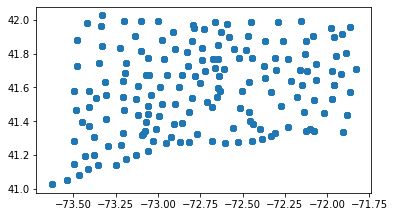

In [13]:
opi_town_gdf.plot()

In [14]:
# assign new gdf to file
opi_town_gdf.to_file('../data/opi_admission_by_town.geojson', driver='GeoJSON')

In [15]:
# name new gdf
towns_gdf = gpd.read_file('../data/opi_admission_by_town.geojson')

In [16]:
opi_town_df['admis'] = opi_town_df['admis'].round(decimals = 0)

In [17]:
opi_town_df.round(0)

,year,town,admis,undup_clients,town_geo,lat,lng,geometry
0,2016,Suffield,35.0,24.0,"Suffield, CT\n(41.983549, -72.663124)",41.983549,-72.663124,POINT (-72.66312 41.98355)
1,2014,Thomaston,51.0,34.0,"Thomaston, CT\n(41.674124, -73.073189)",41.674124,-73.073189,POINT (-73.07319 41.67412)
2,2013,Sprague,35.0,16.0,"Sprague, CT\n(41.640692, -72.066224)",41.640692,-72.066224,POINT (-72.06622 41.64069)
3,2015,Monroe,83.0,46.0,"Monroe, CT\n(41.331612, -73.206797)",41.331612,-73.206797,POINT (-73.20680 41.33161)
4,2016,Cheshire,85.0,50.0,"Cheshire, CT\n(41.498834, -72.901448)",41.498834,-72.901448,POINT (-72.90145 41.49883)
...,...,...,...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,"Salisbury, CT\n(41.983411, -73.422268)",41.983411,-73.422268,POINT (-73.42227 41.98341)
846,2013,Bridgewater,7.0,NaN,"Bridgewater, CT\n(41.535109, -73.366386)",41.535109,-73.366386,POINT (-73.36639 41.53511)
847,2012,Lisbon,NaN,NaN,"Lisbon, CT\n(41.614599, -71.960584)",41.614599,-71.960584,POINT (-71.96058 41.61460)
848,2016,Goshen,15.0,NaN,"Goshen, CT\n(41.831925, -73.225323)",41.831925,-73.225323,POINT (-73.22532 41.83192)


In [18]:
opi_town_df

,year,town,admis,undup_clients,town_geo,lat,lng,geometry
0,2016,Suffield,35.0,24.0,"Suffield, CT\n(41.983549, -72.663124)",41.983549,-72.663124,POINT (-72.66312 41.98355)
1,2014,Thomaston,51.0,34.0,"Thomaston, CT\n(41.674124, -73.073189)",41.674124,-73.073189,POINT (-73.07319 41.67412)
2,2013,Sprague,35.0,16.0,"Sprague, CT\n(41.640692, -72.066224)",41.640692,-72.066224,POINT (-72.06622 41.64069)
3,2015,Monroe,83.0,46.0,"Monroe, CT\n(41.331612, -73.206797)",41.331612,-73.206797,POINT (-73.20680 41.33161)
4,2016,Cheshire,85.0,50.0,"Cheshire, CT\n(41.498834, -72.901448)",41.498834,-72.901448,POINT (-72.90145 41.49883)
...,...,...,...,...,...,...,...,...
845,2012,Salisbury,6.0,NaN,"Salisbury, CT\n(41.983411, -73.422268)",41.983411,-73.422268,POINT (-73.42227 41.98341)
846,2013,Bridgewater,7.0,NaN,"Bridgewater, CT\n(41.535109, -73.366386)",41.535109,-73.366386,POINT (-73.36639 41.53511)
847,2012,Lisbon,NaN,NaN,"Lisbon, CT\n(41.614599, -71.960584)",41.614599,-71.960584,POINT (-71.96058 41.61460)
848,2016,Goshen,15.0,NaN,"Goshen, CT\n(41.831925, -73.225323)",41.831925,-73.225323,POINT (-73.22532 41.83192)


# Data Exploration

### Examine the distribution in the relevant columns

In [19]:
opi_town_df['year'].nunique()

5

In [20]:
opi_town_df['year'].min()

2012

In [21]:
opi_town_df['year'].max()

2016

There is data across five (5) years, from 2012-2016.

In [22]:
opi_town_df['town'].nunique()

170

There is data for 170 towns in Connecticut.

In [23]:
opi_town_df = opi_town_df.sort_values(["year","town"]).drop(['town_geo'], axis=1)
opi_town_df = opi_town_df.drop(['geometry'], axis=1)

In [24]:
# assign new df to file
opi_town_df.to_csv('../data/opi_town_clean.csv', index=False)

The dataframe is now sorted by year, and then in each year, it is sorted alphabetically.

<AxesSubplot:>

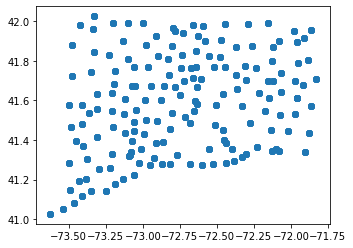

In [25]:
towns_gdf.plot()

The geodataframe is now mapped to the shape of the state of Connecticut.

### What observations and questions do you have after exploring the data?

After exploring this data, I still believe that a temporal analysis is important. I will likely have to use multiple maps to compare the differences across the yearse, in conjuction with other types of data representation, such as line graphs. That is the best way to determine what changes have occured over time.